<a href="https://colab.research.google.com/github/YefridC09/ST-554_Big_data_analysis/blob/main/HW4_Yefrid_Cordoba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code from homework 3

### Reading data

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
students_data = pd.read_csv('https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt',
                            sep = ';')
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Summarizing data

In [91]:
students_data.isnull().sum() # Validate that there are no missing values for any of variables

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [92]:
students_data.school.value_counts() #one-way contingency table

,count
school,
GP,349
MS,46


In [93]:
#convert sec variable
students_data["sex1"] = students_data.sex.astype("category")
students_data.sex1 = students_data.sex1.cat.rename_categories(["Female", "Male"])
#convert survived variable
students_data["school1"] = students_data.school.astype("category")
students_data.school1 = \
    students_data.school1.cat.rename_categories(["Gabriel Pereira",
                                                 "Mousinho da Silveira"])


In [94]:
two_way = pd.crosstab(
    students_data.school1,
    students_data.sex1,
    rownames = ["School"],
    colnames = ["Sex"]
) #Two-way contingency table

## Task 1

[Text(0.5, 0, 'School'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Stacked bar plot for count of males and females from each school')]

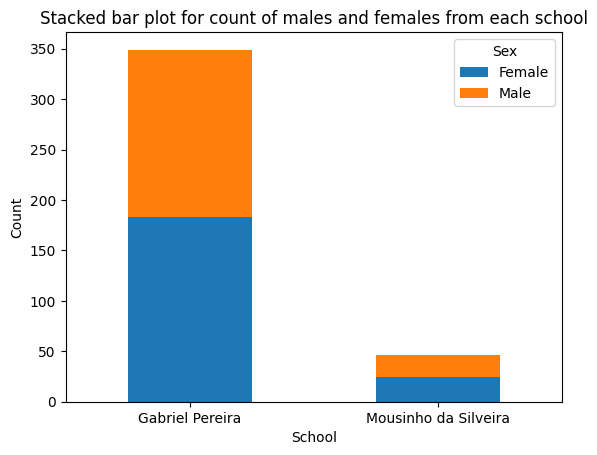

In [95]:
#Stacked bar plot
two_way.plot.bar(stacked = True,rot = 0).\
    set(xlabel = 'School', ylabel = 'Count',
        title = 'Stacked bar plot for count of males and females from each school')

[Text(0.5, 0, 'School'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Side-by-side bar plot for count of males and females from each school')]

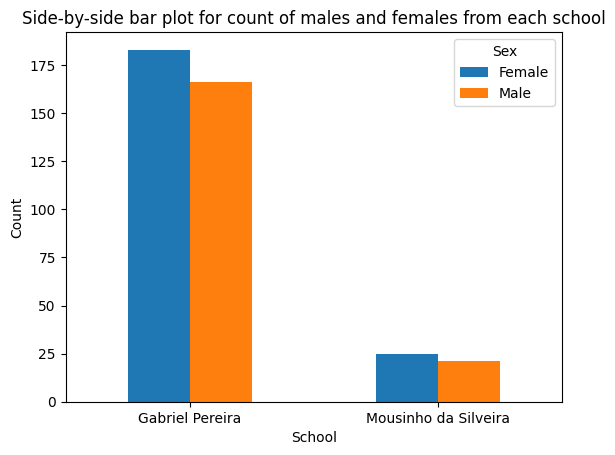

In [96]:
#Stacked bar plot
two_way.plot.bar(rot = 0).\
    set(xlabel = 'School', ylabel = 'Count',
        title = 'Side-by-side bar plot for count of males and females from each school')

Approximately 50% of students at Gabriel Pereira School are male, and the same pattern is observed at Mousinho da Silveira School.

/tmp/ipython-input-253883978.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  students_data.hist(column = "G3", by = "sex1", bins = 15)


Text(0, 0.5, 'Final Grade')

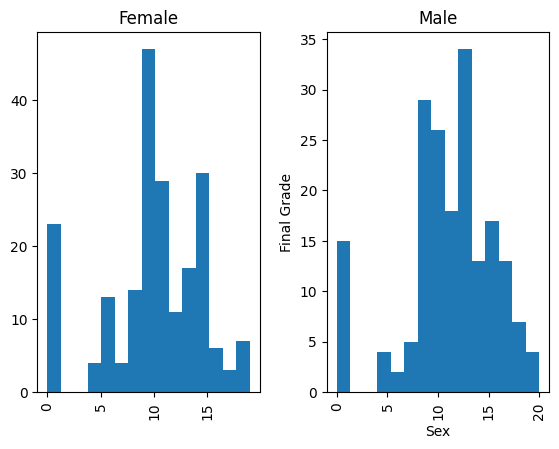

In [97]:
students_data.hist(column = "G3", by = "sex1", bins = 15)
plt.xlabel("Sex")
plt.ylabel("Final Grade")

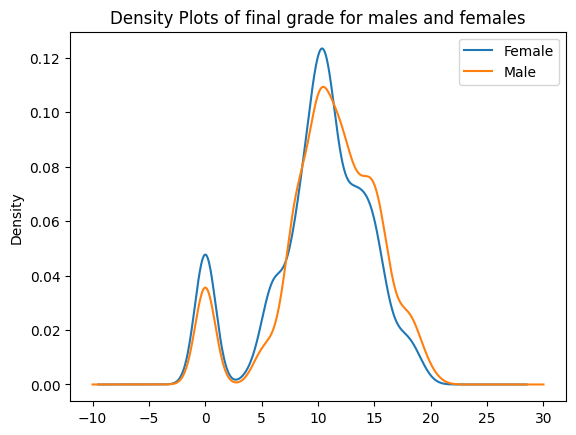

In [98]:
students_data.loc[students_data.sex1 == 'Female'].G3.plot.density(bw_method = 0.2, label = "Female",
                                  title = "Density Plots of final grade for males and females")
students_data.loc[students_data.sex1 == 'Male'].G3.plot.density(bw_method = 0.2, label = "Male")
plt.legend()

Text(0, 0.5, 'Final Grade')

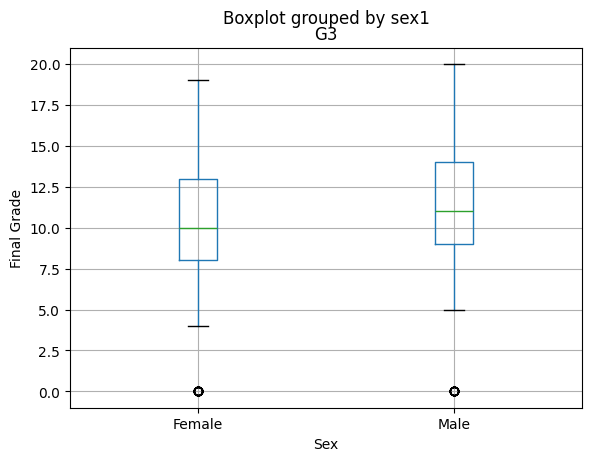

In [99]:
students_data.boxplot(column = "G3", by = "sex1")
plt.xlabel("Sex")
plt.ylabel("Final Grade")


Males tend to have a slightly higher final grade

(187,)
(208,)


[Text(0.5, 0, 'Age')]

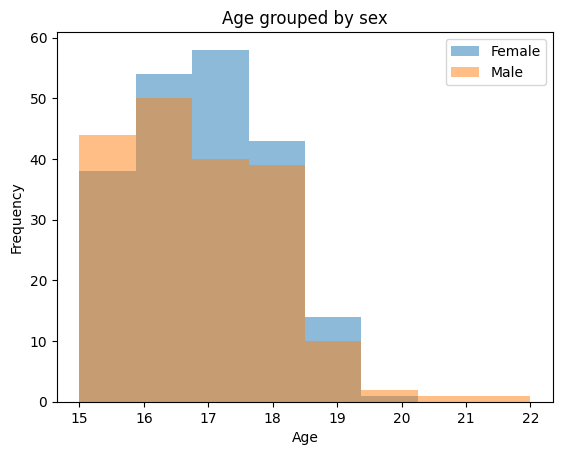

In [110]:
sub_male = students_data.loc[students_data.sex1 == 'Male', 'age']
sub_female = students_data.loc[students_data.sex1 == 'Female', 'age']
sub_male.isnull().sum()
sub_female.isnull().sum()
print(sub_male.shape)
print(sub_female.shape)
sub_male = pd.concat([sub_male, pd.Series([np.nan for _ in range(21)])])
sub_male
plot_data = pd.DataFrame(zip(sub_female, sub_male), columns = ["Female", "Male"])
plot_data.plot.hist(alpha = 0.5, bins = 8, title = 'Age grouped by sex').set(xlabel = 'Age')
#print(sub_male.shape)
#students_data.loc[students_data.sex1 == 'Female', 'age'].plot.hist(alpha = 0.5, bins = 5, label = "Female")
#students_data.loc[students_data.sex1 == 'Male', 'age'].plot.hist(alpha = 0.5, bins = 5,label = "Male")
#plt.legend()

Males tend to have a lower age than females who participated in the study

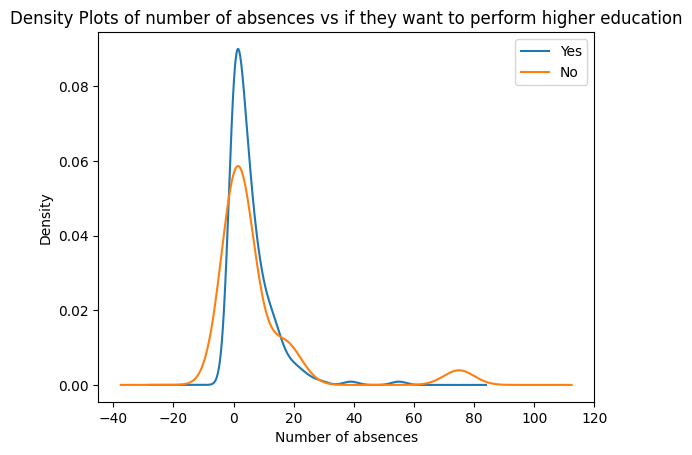

In [130]:
students_data.loc[students_data.higher == 'yes'].absences.plot.density(bw_method = 0.3, label = "Yes",
                                  title = "Density Plots of number of absences vs if they want to perform higher education")
students_data.loc[students_data.higher == 'no'].absences.plot.density(bw_method = 0.3, label = "No").\
set(xlabel = 'Number of absences')
plt.legend()

It is shown that the density in the number of absences is lower among students who intend to pursue higher education, whereas students who don't intend to pursue higher education exhibit a greater spread of absences.

Text(0, 0.5, 'First period grade')

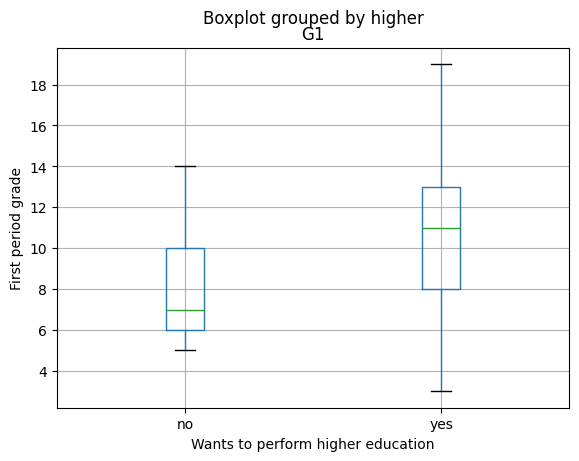

In [133]:
students_data.boxplot(column = "G1", by = "higher")
plt.xlabel("Wants to perform higher education")
plt.ylabel("First period grade")


Students who want to pursue higher education have higher median first-period grades than those who do not; however, the distributions are broader, whereas students who don't want to pursue higher education exhibit lower median and a narrower spread.

[Text(0.5, 0, 'Number of absences'),
 Text(0, 0.5, 'Final grade'),
 Text(0.5, 1.0, 'Final grades as a function of the number of absences grouped by sex')]

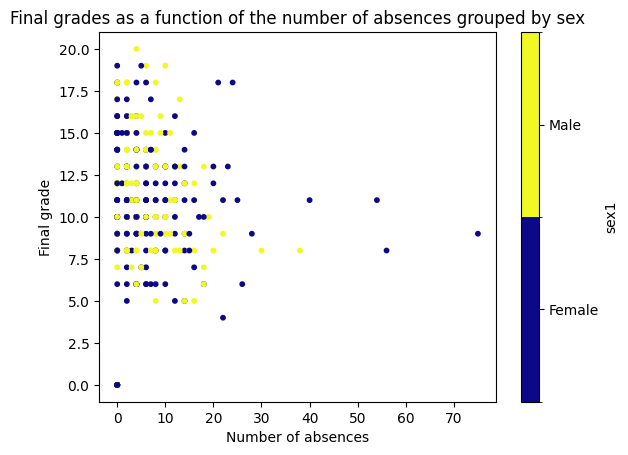

In [143]:
students_data.plot.scatter(x = "absences", y = "G3", c = "sex1", cmap = "plasma", s = 10).\
set(xlabel = 'Number of absences',
    ylabel = 'Final grade',
    title = 'Final grades as a function of the number of absences grouped by sex')
#

As the number of absences increases, the final grade decreases not proportionally for males and females.

[Text(0.5, 0, 'First period grade'),
 Text(0, 0.5, 'Final grade'),
 Text(0.5, 1.0, 'Final grades as a function of the first period grades, grouped by school')]

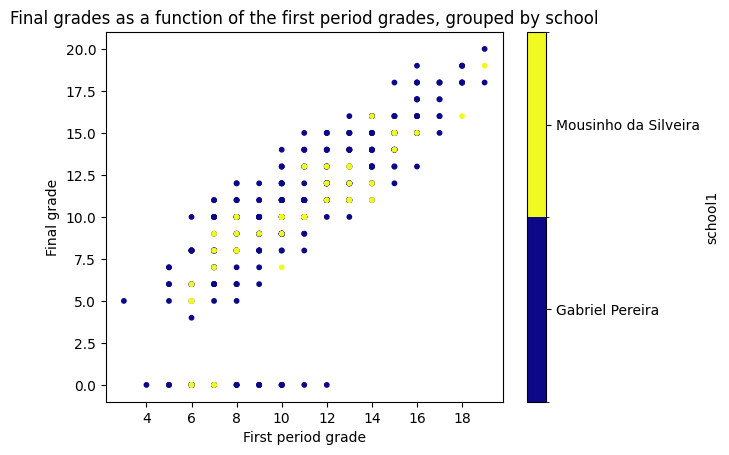

In [149]:

#s for size (should be a numeric column), cmap can be used with c for specifying color scales
students_data.plot.scatter(x = "G1", y = "G3", c = "school1", cmap = "plasma", s = 10).\
set(xlabel = 'First period grade',
    ylabel = 'Final grade',
    title = 'Final grades as a function of the first period grades, grouped by school')
#

The trend indicates a linear relationship between first-period grades and final grades, and evidence that students who perform well in the first period tend to perform well throughout the school year.

# Plotting the NFL data